In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# SQLite
import sqlite3
conn = sqlite3.connect("db/nba.sqlite")
c = conn.cursor()

In [3]:
# preview data
c.execute('SELECT * FROM PLAYERS')
all_rows = c.fetchall()
print(all_rows)

[(0, 1.0, 'Stephen Curry', 'GSW', 40231758, '$43,006,362 ', '$45,780,966 ', None, None, None, 'Bird Rights', '$129,019,086 ', 2010, 'G', 6.25, 190.0, '1988-03-14 00:00:00', 'Davidson College', 31, 69, 52, 17, 33.8, 27.3, 9.2, 19.4, 47.2, 5.1, 11.7, 43.7, 3.8, 4.2, 91.6, 0.7, 4.7, 5.3, 5.2, 2.8, 1.3, 0.4, 10.0), (1, 2.0, 'Chris Paul', 'OKC', 38506482, '$41,358,814 ', '$44,211,146 ', None, None, None, None, '$124,076,442 ', 2006, 'G', 6.0, 175.0, '1985-05-06 00:00:00', 'Wake Forest University', 34, 58, 39, 19, 32.0, 15.6, 5.2, 12.4, 41.9, 2.2, 6.1, 35.8, 3.0, 3.5, 86.2, 0.6, 3.9, 4.6, 8.2, 2.6, 2.0, 0.3, 5.2), (2, 3.0, 'Russell Westbrook', 'HOU', 38178000, '$41,006,000 ', '$43,848,000 ', '$46,662,000 ', None, None, 'Bird Rights', '$123,032,000 ', 2009, 'G', 6.25, 200.0, '1988-11-12 00:00:00', 'University of California, Los Angeles', 30, 73, 44, 29, 36.0, 22.9, 8.6, 20.2, 42.8, 1.6, 5.6, 29.0, 4.1, 6.2, 65.6, 1.5, 9.6, 11.1, 10.7, 4.5, 1.9, 0.5, 4.0), (3, 4.0, 'John Wall', 'WAS', 37800000

In [4]:
# to df
df = pd.read_sql('SELECT * FROM PLAYERS', conn)

In [5]:
df = df[['salary_2019to2020','age', 'pts','reb','ast', 'plusminus']]
df.head()

,salary_2019to2020,age,pts,reb,ast,plusminus
0,40231758,31,27.3,5.3,5.2,10.0
1,38506482,34,15.6,4.6,8.2,5.2
2,38178000,30,22.9,11.1,10.7,4.0
3,37800000,28,20.7,3.6,8.7,-4.8
4,37800000,29,36.1,6.6,7.5,4.6


In [6]:
df = df.rename(columns={"salary_2019to2020":"y","age":"X1", "pts":"X2","reb":"X3","ast":"X4", "plusminus":"X5"})
df.head()

,y,X1,X2,X3,X4,X5
0,40231758,31,27.3,5.3,5.2,10.0
1,38506482,34,15.6,4.6,8.2,5.2
2,38178000,30,22.9,11.1,10.7,4.0
3,37800000,28,20.7,3.6,8.7,-4.8
4,37800000,29,36.1,6.6,7.5,4.6


In [7]:
X = df.drop(columns=['y'])
y = df['y']

In [8]:
print(X.shape, y.shape)
X.shape

(295, 5) (295,)


(295, 5)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
model = LinearRegression(normalize=False)

In [11]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5750174983280251
Testing Score: 0.6386285703232046


In [12]:
model.coef_

array([ 466525.93317162,  755425.24357726,  535291.40920341,
       1012311.63360438,  302084.19959373])

In [13]:
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.5904805478788308


Text(0.5, 1.0, 'Residual Plot')

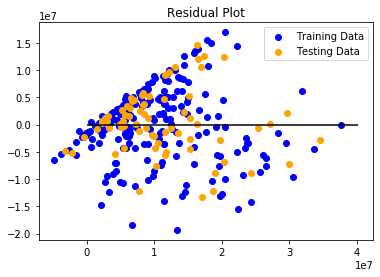

In [14]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [15]:
#initial prediction- to test
model.predict(np.array([34,10.8,6.5,1.2,-1.2]).reshape(1, -1))

array([12762422.14836008])

In [26]:
# input - using integer to be able to calulate prediction 
age = int(input("Enter your age: "))

Enter your age: 21


In [27]:
pts = int(input("Enter your average points per game: "))

Enter your average points per game: 11


In [28]:
reb = int(input("Enter your average rebounds per game: "))

Enter your average rebounds per game: 7


In [29]:
ast = int(input("Enter your average assists per game: "))

Enter your average assists per game: 2


In [30]:
plusminus = int(input("Enter your plus-minus: "))

Enter your plus-minus: -1


In [31]:
# prediction based off of the user inputs
model.predict(np.array([age, pts, reb, ast, plusminus]).reshape(1,-1))

array([7986581.91724837])